In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers , datasets , models
import matplotlib.pyplot as plt
import numpy as np

2023-09-08 12:37:09.612299: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 12:37:09.870995: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 12:37:09.873192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 12:37:11.659256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [6]:
dict = { 0 : 'airplane',1 : 'automobile' , 2 : 'bird' , 3 : 'cat' , 4 : 'deer' , 5 : 'dog' , 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

def plot_sample(X , y , index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(dict[y[index]])


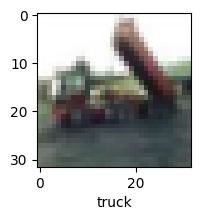

In [7]:
plot_sample(X_train , y_train , 2)

In [8]:

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [9]:
ANN = models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000 , activation='relu'),
    tf.keras.layers.Dense(1000 , activation='relu'),
    tf.keras.layers.Dense(10 , activation='sigmoid')
])

ANN.compile(
    optimizer=tf.optimizers.SGD(),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

ANN.fit(
    X_train , y_train ,
    epochs=5
)

2023-09-08 12:37:17.693813: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36864000 exceeds 10% of free system memory.
2023-09-08 12:37:17.731019: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36864000 exceeds 10% of free system memory.
2023-09-08 12:37:17.747888: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36864000 exceeds 10% of free system memory.
2023-09-08 12:37:19.451155: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5


2023-09-08 12:37:21.417886: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36864000 exceeds 10% of free system memory.


1563/1563 [==============================] - 87s 55ms/step - loss: 1.8138 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.6245 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5438 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.4851 - accuracy: 0.4743
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4353 - accuracy: 0.4952


In [10]:
ANN.evaluate(X_test , y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.4754 - accuracy: 0.4698


[1.4754395484924316, 0.4697999954223633]

In [11]:
CNN = models.Sequential([
    #cnn
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(10 , activation='softmax')
])

In [12]:
CNN.compile(
    optimizer=keras.optimizers.Adam(), 
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

CNN.fit(
    X_train , y_train ,
    epochs=5
)

Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4642 - accuracy: 0.4731
Epoch 2/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1079 - accuracy: 0.6104
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9802 - accuracy: 0.6589
Epoch 4/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8980 - accuracy: 0.6902
Epoch 5/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8363 - accuracy: 0.7087


In [13]:
CNN.evaluate(X_test , y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9065 - accuracy: 0.6913


[0.9065378904342651, 0.6912999749183655]

In [14]:
y_pred = CNN.predict(X_test)
y_pred

313/313 [==============================] - 2s 6ms/step


array([[1.7112878e-03, 7.7729777e-04, 6.1888071e-03, ..., 6.1508996e-04,
        6.6300571e-02, 3.7254242e-04],
       [6.3456781e-02, 1.3469760e-01, 2.6665162e-05, ..., 2.0296613e-06,
        7.9707301e-01, 4.7378973e-03],
       [6.5089449e-02, 3.6252168e-01, 1.6518340e-03, ..., 2.8711497e-03,
        5.1214761e-01, 5.1924262e-02],
       ...,
       [8.5479289e-04, 3.7677878e-06, 2.2686434e-01, ..., 1.3860859e-01,
        1.2044331e-04, 3.2511601e-04],
       [1.3300367e-01, 3.4536149e-02, 6.9196871e-03, ..., 2.1194224e-03,
        2.7125809e-04, 5.4148090e-04],
       [2.0855147e-04, 1.2464737e-04, 4.4278111e-03, ..., 9.5058078e-01,
        1.9635227e-05, 1.3290307e-05]], dtype=float32)

In [15]:
np.argmax(y_pred[0])


3

In [16]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [17]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

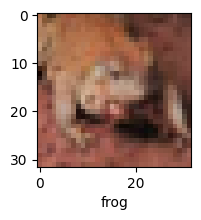

In [18]:
plot_sample(X_test , y_test , 5)

In [19]:
dict[y_classes[5]]

'frog'

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_classes))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.77      0.84      0.80      1000
           2       0.59      0.58      0.58      1000
           3       0.56      0.42      0.48      1000
           4       0.72      0.55      0.62      1000
           5       0.57      0.64      0.61      1000
           6       0.67      0.84      0.75      1000
           7       0.75      0.74      0.74      1000
           8       0.82      0.74      0.78      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [21]:
import pickle

In [22]:
with open("object_identifier_model.pickle" , "wb") as file:
    pickle.dump(CNN , file)

In [23]:
with open("object_identifier_model_ANN.pickle" , "wb") as file:
    pickle.dump(ANN , file)